- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://medium.com/district-data-labs/principal-component-analysis-with-python-4962cd026465

In [28]:
import pandas as pd

from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('diabetes.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
corr = df.loc[df['Outcome'] == 1].drop('Outcome',axis=1).corr()

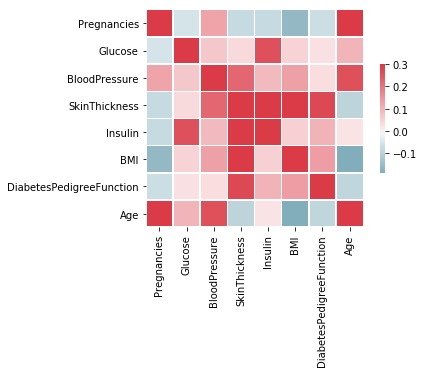

In [45]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [14]:
labels = df.loc[:,"Outcome"]
features = df.drop("Outcome", axis=1)

In [15]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
guass_NB = GaussianNB()
guass_NB.fit(train_features,train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
predicted_labels = guass_NB.predict(test_features)

In [22]:
# Use classification_report to compare the test labels (what we know to be true) and the predicted labels generated by
# the Gaussian Naive Bayes
print(metrics.classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       123
           1       0.62      0.68      0.65        69

   micro avg       0.73      0.73      0.73       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.74      0.73      0.74       192



In [26]:
print (metrics.confusion_matrix(test_labels, predicted_labels))

[[94 29]
 [22 47]]
